In [36]:
import sys
import os

import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
import networkx as nx

from tqdm import tqdm

N = 10_000
batch_size = 100
threshold = 3
output_path = os.path.abspath(os.path.join('..', f'app/out/fastsar/threshold={threshold}/N={N}'))
# output_path = os.path.abspath(os.path.join('..', f'out/fastsar/threshold={threshold}/N={N}'))
if output_path not in sys.path:
    sys.path.append(output_path)

# グラフの色指定
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
markers = ["o", "s", "D", "P", "X", "d", "H", "v", "p", "*"]

In [25]:
df_all = pd.DataFrame()
existing_files = []
time = []

for i in range(batch_size):
    index = f"{i:02d}"
    file = f'results_{index}.csv'
    if not os.path.exists(os.path.join(output_path, file)):
        continue
    df = pd.read_csv(os.path.join(output_path, file))
    itrs = df['itr'].max() + 1
    for itr in range(itrs-1):
        if len(df["itr"] == str(itr)) != len(df["itr"] == str(itr+1)):
            df = df.drop(df[df["itr"] == str(itr + 1)])
            print(f"doroped! : i={i}, itr={itr}")
            itrs = itr + 1
            break

    if i != 0:
        df["itr"] = df["itr"] + 1 + df_all["itr"].max()

    df_all = pd.concat([df_all, df])
    existing_files.append(file)

print(existing_files)
display(df_all)

['results_00.csv', 'results_01.csv', 'results_02.csv', 'results_03.csv', 'results_04.csv', 'results_05.csv', 'results_06.csv', 'results_07.csv', 'results_08.csv', 'results_09.csv', 'results_10.csv', 'results_11.csv', 'results_12.csv', 'results_13.csv', 'results_14.csv', 'results_15.csv', 'results_16.csv', 'results_17.csv', 'results_18.csv', 'results_19.csv', 'results_20.csv', 'results_21.csv', 'results_22.csv', 'results_23.csv', 'results_24.csv', 'results_25.csv', 'results_26.csv', 'results_27.csv', 'results_28.csv', 'results_29.csv', 'results_30.csv', 'results_31.csv', 'results_32.csv', 'results_33.csv', 'results_34.csv', 'results_35.csv', 'results_36.csv', 'results_37.csv', 'results_38.csv', 'results_39.csv', 'results_40.csv', 'results_41.csv', 'results_42.csv', 'results_43.csv', 'results_44.csv', 'results_45.csv', 'results_46.csv', 'results_47.csv', 'results_48.csv', 'results_49.csv']


,itr,alpha,beta,lambda,time,A,R
0,0,-1.0,0.0,0.00,6.892592,0,1000
1,0,-1.0,0.0,0.01,6.830896,0,1000
2,0,-1.0,0.0,0.02,6.830896,0,1000
3,0,-1.0,0.0,0.03,6.830896,0,1000
4,0,-1.0,0.0,0.04,6.830896,0,1000
...,...,...,...,...,...,...,...
1000,49,1.0,0.0,1.96,9.088767,0,9968
1001,49,1.0,0.0,1.97,9.008133,0,9969
1002,49,1.0,0.0,1.98,9.142714,0,9966
1003,49,1.0,0.0,1.99,9.699005,0,9967


In [34]:
dfs = { itr: sub_df for itr, sub_df in df_all.groupby('itr') }

lamb_values = df_all['lambda'].unique()
lamb_values = np.array(sorted(lamb_values))

alpha_values = df_all['alpha'].unique()
alpha_values = np.array(sorted(alpha_values))

R_infty = np.zeros((len(dfs), len(alpha_values), len(lamb_values)))

for itr, df in tqdm(dfs.items()):
    dfs_alpha = { alpha: sub_df for alpha, sub_df in df.groupby('alpha') }
    alpha_idx = 0
    for alpha, sub_df in dfs_alpha.items():
        dfs_lam = { lam: sub_df for lam, sub_df in sub_df.groupby('lambda') }
        lam_idx = 0
        for lam, sub_df in dfs_lam.items():
            R_infty[itr, alpha_idx, lam_idx] = sub_df['R'].iloc[-1]
            lam_idx += 1
        alpha_idx += 1

print(f"len(lamb_values): {len(lamb_values)}")
print(lamb_values)
print(f"len(alpha_values): {len(alpha_values)}")
print(alpha_values)

100%|██████████| 50/50 [00:01<00:00, 46.76it/s]

len(lamb_values): 201
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92

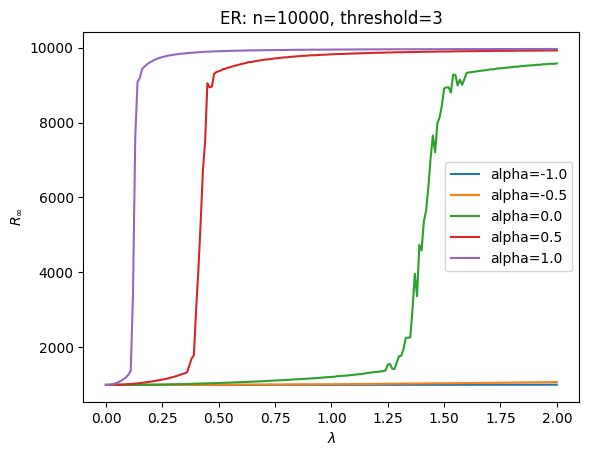

In [35]:
for alpha_idx, alpha in enumerate(alpha_values):
    plt.plot(lamb_values, R_infty[:, alpha_idx, :].mean(axis=0), label=f'alpha={alpha}')

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$R_\infty$')
plt.title(f"ER: n={N}, threshold={threshold}")
plt.legend()
plt.show()


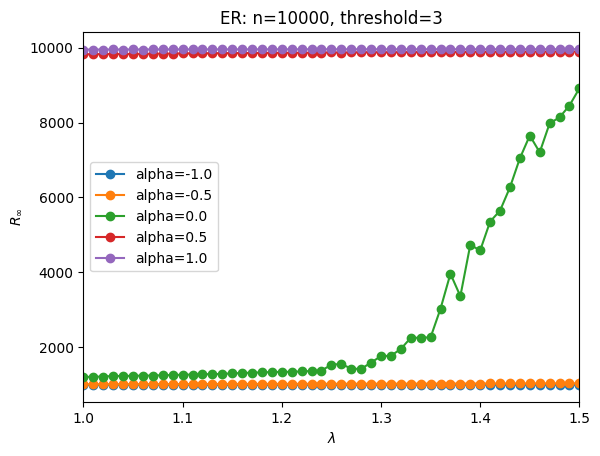

In [28]:
for alpha_idx, alpha in enumerate(alpha_values):
    plt.plot(lamb_values, R_infty[:, alpha_idx, :].mean(axis=0), label=f'alpha={alpha}', marker='o')

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$R_\infty$')
plt.title(f"ER: n={N}, threshold={threshold}")
plt.xlim(1.0, 1.5)
plt.legend()
plt.show()


In [52]:
def gen_pk_from_nx(G):
    N = G.number_of_nodes()
    degrees = np.zeros(N)
    for node in G.nodes():
        deg_k = G.degree(node)
        degrees[deg_k] += 1
    pk = degrees / N
    return pk

In [68]:
network_path = os.path.join('..', 'out/pk/config')
N_list = [10000, 40000, 100000]
gamma_list = [2.1, 2.5, 3.0]
G_list = np.zeros((len(N_list), len(gamma_list)), dtype=object)

for N_idx, N in enumerate(N_list):
    for gamma_idx, gamma in enumerate(gamma_list):
        edgelist_path = os.path.join(network_path, f'N={N}/gamma={gamma}/edgelist.txt')
        if not os.path.exists(edgelist_path):
            continue
        # エッジリストを読み込む
        G = nx.read_edgelist(edgelist_path, nodetype=int)
        G_list[N_idx, gamma_idx] = G

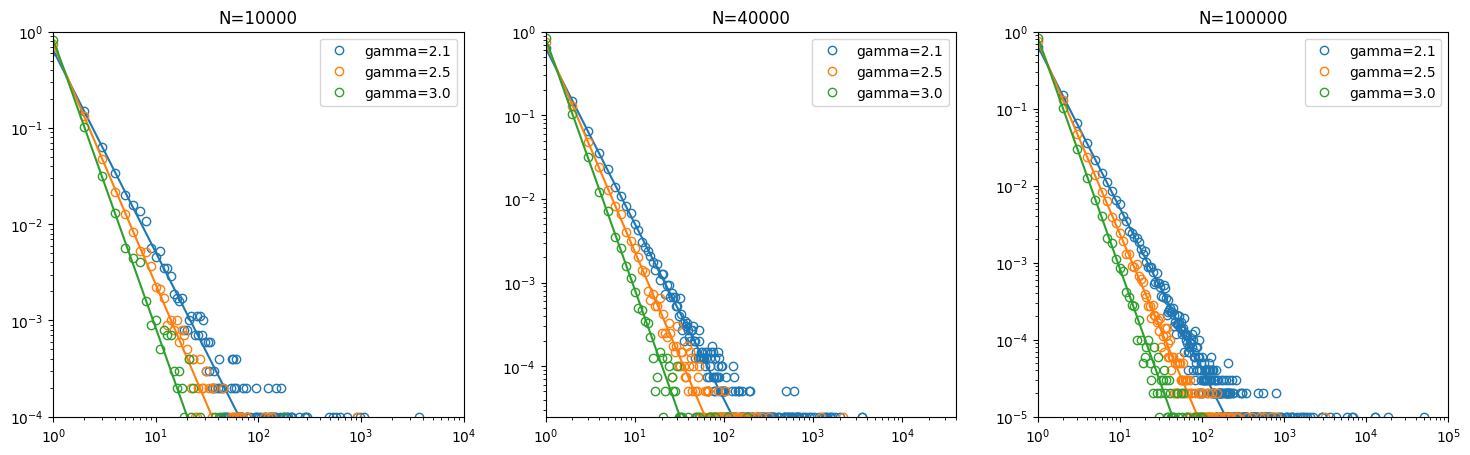

In [69]:
fig, axes = plt.subplots(1, len(N_list), figsize=(6*len(N_list), 5))

for N_idx, N in enumerate(N_list):
    ax = axes[N_idx]
    for gamma_idx, gamma in enumerate(gamma_list):
        pk = gen_pk_from_nx(G_list[N_idx, gamma_idx])
        ax.plot(pk, label=f'gamma={gamma}', linestyle='', marker='o', markerfacecolor='none', markeredgecolor=colors[gamma_idx])
        x = np.arange(1, N)
        y = x**(-gamma)
        C = y.sum()
        y = y / C
        ax.plot(x, y, linestyle='-', color=colors[gamma_idx])
    ax.set_title(f'N={N}')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1, N)
    ax.set_ylim(pk[pk > 0].min(), 1)
    ax.legend()
plt.show()
